<h1> Car price prediction </h1>

<h3> Notebook has the following sections:</h3>
<ol>
    <li> Data Understanding
    <li> Data Wrangling
    <li> Exploratory Data Analysis
    <li> Data Preparation
    <li> Model Development
 </ol>

<h>Data Set Information:</h>

<p>This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.</p>




<h2> Attribute Information:</h2>

<p>Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.</p>



In [4]:
# Import pandas library
import pandas as pd

# Read the dataset and assign it to variable "df"
df = pd.read_csv("automobile.csv")

<h3>1.Data understanding:</h3>

In [5]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
#bottom rows of dataframe
df.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [44]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [31]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.<br>
For example, the attribute "symboling" has 205 counts, the mean value of this column is 0.83, the standard deviation is 1.25, the minimum value is -2, 25th percentile is 0, 50th percentile is 1, 75th percentile is 2, and the maximum value is 3.
<br>
However, what if we would also like to check all the columns including those that are of type object.
<br><br>

You can add an argument <code>include = "all"</code> inside the bracket. Let's try it again.
</p>

In [32]:
# describe all the columns in "df" 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [30]:
df[["symboling","price"]].describe(include="all")

,symboling,price
count,205.000000,205
unique,NaN,187
top,NaN,?
freq,NaN,4
mean,0.834146,NaN
std,1.245307,NaN
min,-2.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,2.000000,NaN


<h1>2.Data wrangling</h1>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<p>Identifying missing values:</p>
<p>In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.
</p>

In [7]:
# replace "?" to NaN
df.replace("?",np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<p>"True" stands for missing value, while "False" stands for not missing value.</p>

In [9]:
#counting missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

Handling missing data:

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [10]:
#Replace "NaN" by mean value in "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [11]:
#Replace "NaN" by mean value in "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype('float').mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [12]:
#Replace NaN by mean value in "bore" column
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [13]:
#Replace NaN by mean value in "peak-rpm" column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [14]:
#Replace NaN by mean value in "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [15]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [17]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [18]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
#convert data types to correct format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")




In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h1>3.Exploratory Data Analysis</h1>

<h3>Understanding the features and data</h3>

In [21]:
# symboling: -3 (least risky) to +3 (most risky)
# Most cars are 0,1,2
df['symboling'].astype('category').value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [47]:
## drivewheel: frontwheel, rear wheel or four-wheel drive 
df['drive-wheels'].value_counts()


fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [97]:
df['make'].unique



<bound method Series.unique of 0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9              bmw
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17       chevrolet
18       chevrolet
19       chevrolet
20           dodge
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           honda
          ...     
171         toyota
172         toyota
173         toyota
174         toyota
175         toyota
176         toyota
177         toyota
178     volkswagen
179     volkswagen
180     volkswagen
181     volkswagen
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190          volvo


In [22]:
#engine-location
df['engine-location'].value_counts().to_frame()


,engine-location
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

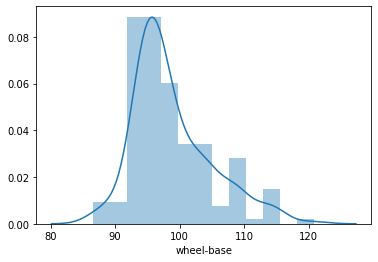

In [23]:
# wheelbase: distance between centre of front and rear wheels
sns.distplot(df['wheel-base'])
plt.show()

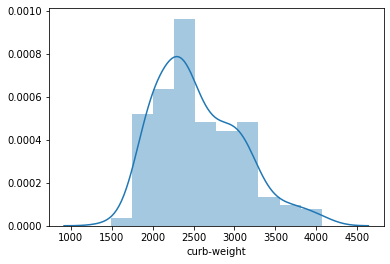

In [24]:
# curbweight: weight of car without occupants or baggage
sns.distplot(df['curb-weight'])

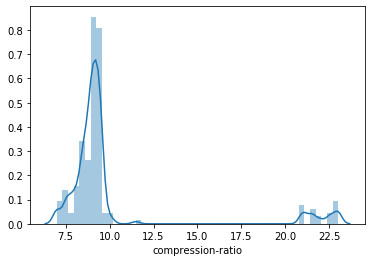

In [25]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(df['compression-ratio'])
plt.show()

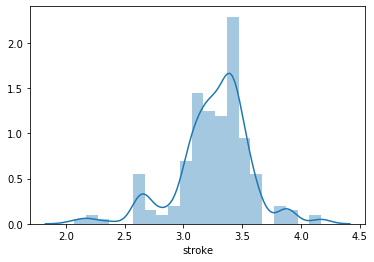

In [28]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(df['stroke'])
plt.show()


In [29]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

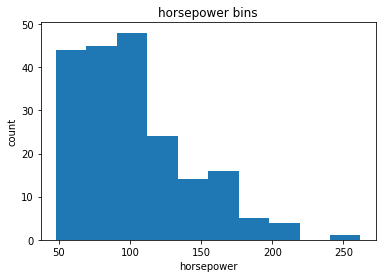

In [30]:

plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [31]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [32]:
group_names = ['Low', 'Medium', 'High']

In [33]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [34]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

<p>the bins for "horsepower" with 3 categories ("Low","Medium" and "High").

We successfully narrow the intervals from 57 to 3!</p>

Text(0.5, 1.0, 'horsepower bins')

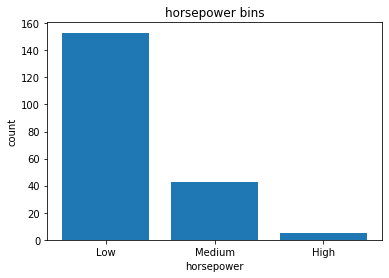

In [35]:

plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

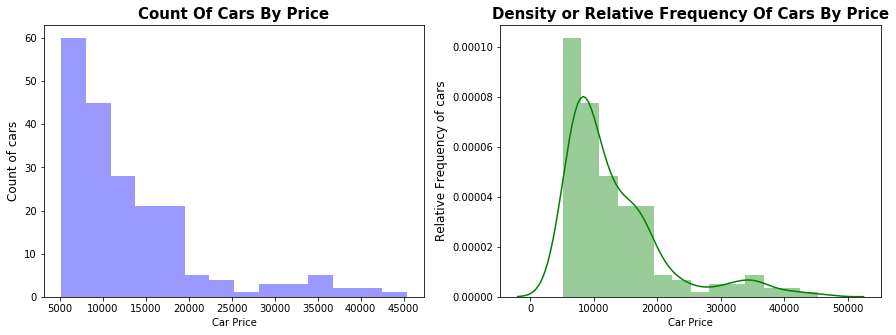

In [36]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

Observations on Target Variable- Price:
<ul>
<li>The target variable price has a positive skew, however majority of the cars are low priced.
<li>More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.
<li>Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve
from little less than 30000 upto 45,000/50,000)
</ul>

In [37]:
# converting symboling to categorical
df['symboling'] = df['symboling'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symboling            201 non-null object
normalized-losses    201 non-null int32
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-n

In [38]:
#creating df  with numeric var's only
cars_numeric=df.select_dtypes(include=['float64','int64','int32'])
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0


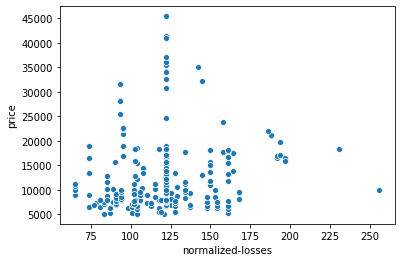

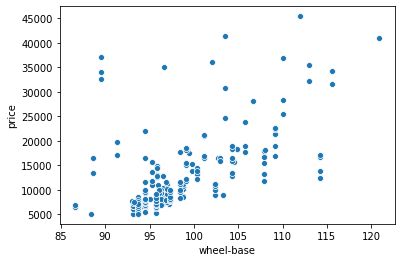

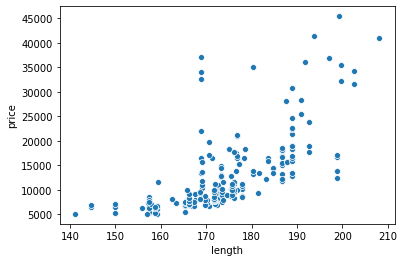

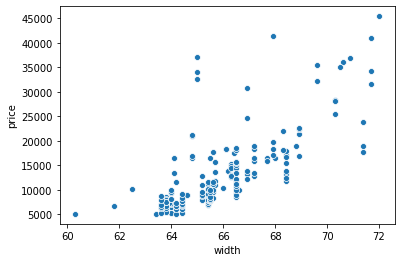

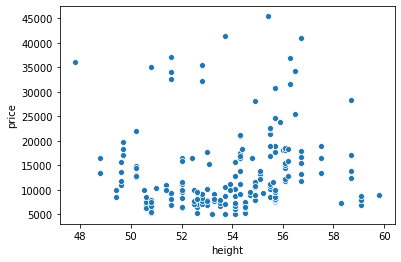

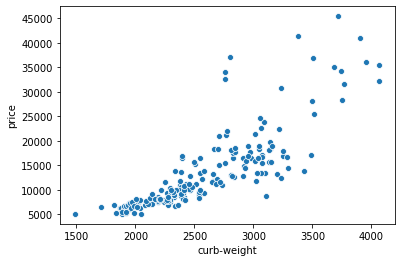

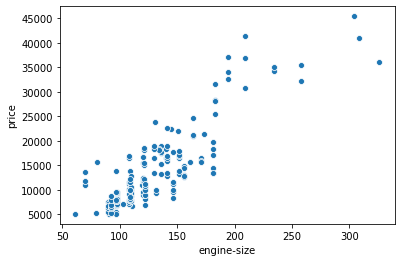

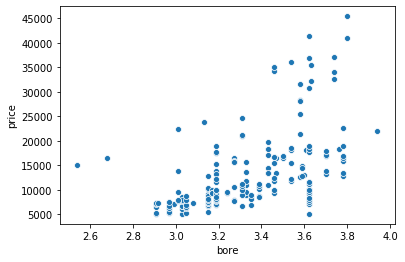

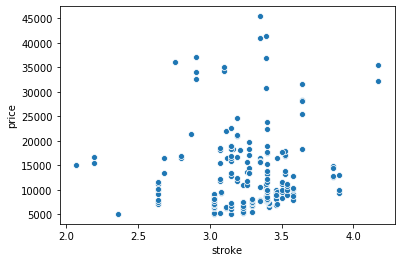

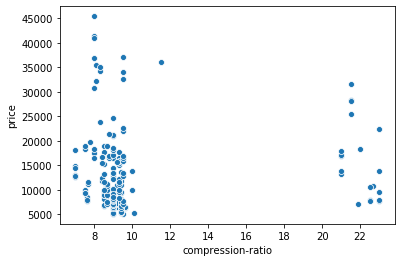

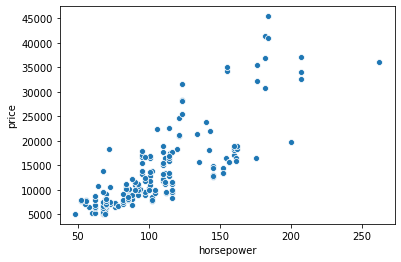

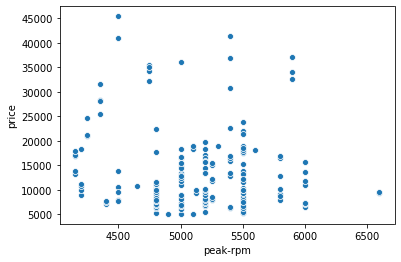

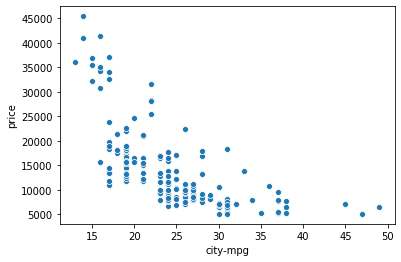

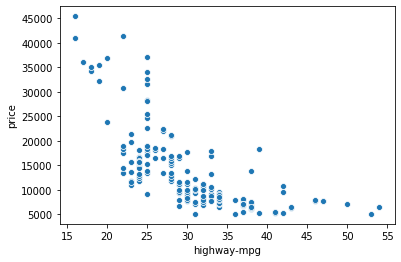

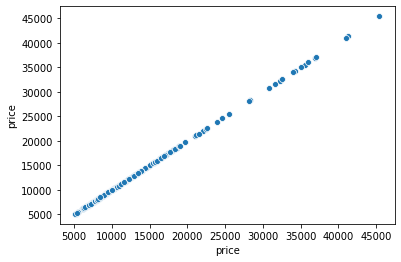

In [39]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (cars_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=cars_numeric[col],y=cars_numeric['price'])

We find,
<ul>
 <li>These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg,highway mpg.

<li>Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.
</ul>

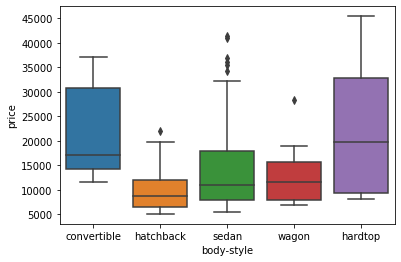

In [40]:
#Boxplot
sns.boxplot(x="body-style", y="price", data=df)

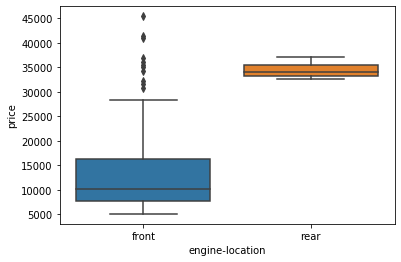

In [177]:
sns.boxplot(x="engine-location", y="price", data=df)

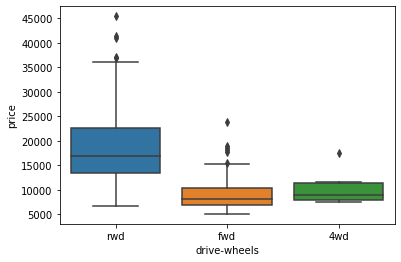

In [178]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

We find:
<ul>
<li>the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.
<li>the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.
<li>the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.
    </ul>

<h2>Descriptive statistical analysis</h2>

<h3>Correlation</h3>
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p3>Pearson Correlation</p>

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


In [72]:
#correlation matrix
df.corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415
engine-size,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155
stroke,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269
compression-ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187871,1.000000,-0.214489,-0.435780,0.331425,0.268465,0.071107


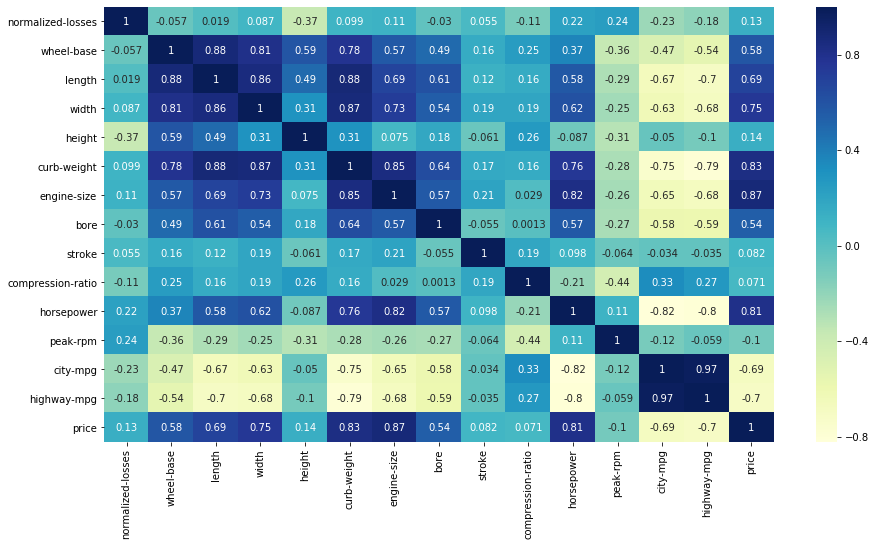

In [73]:
corr=cars_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

<h3>Useful insights from Corr Heatmap</h3>
Dependent var and indep. var's
Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables represent the size/weight/engine power of the car)

Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

Correlation among independent variables:
Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

<h3>P-value:</h3>

<p>The P-value is the probability value that the correlation between these two variables is statistically significant.</p>
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [2]:
from scipy import stats

In [43]:
# horsepower Vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270651004e-48
The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


In [42]:
# wheel-base Vs Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


In [44]:
#length Vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466159053e-30


In [45]:
#width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


In [46]:
#curb-weight Vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53


In [47]:
# engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


In [48]:
# bore Vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


In [49]:
#city-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.3211320655676368e-29


In [51]:
#highway-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476807e-31


<h3>conclusion:</h3>
<ul>
    <li>the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)
    <li>the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)
     <li>the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).
      <li>the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).
       <li>the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).
        <li>the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).
       <li>the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).
       <li>he p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.
        <li>the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.
        </ul>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [55]:
#grouping "drive-wheels" by different categories 
df_gptest = df[['drive-wheels','price']]

In [57]:
grouped_test2=df_gptest.groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [58]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [59]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [60]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [61]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [62]:
#4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<p>This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance</p>


<h2> Conclusion: Important variables</h2>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>


<h1>4.Data preparation </h1>

In [84]:
X=df.drop(columns=['price','horsepower-binned' ])
y=df['price']

In [85]:
# creating dummy variables for categorical variables

cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head(2)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [86]:
#creating dummy variables
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
X=X.drop(columns=cars_categorical)
X.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27


In [88]:
X=pd.concat([X,cars_dummies],axis=1)
X.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

<p>Since i lack the ability to perform feature engineering stage effectively now, i'm skipping it.</p>

<h1>5.Model Development</h1>

<p>Since dependent variable price looks to be linearly related to most of the independent variables we are using Linear Regression only and not other types of regression like Polynomial, Random Forest/Boosting regression etc.</p>

In [100]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [167]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.976311578362385
R-sqaure on test data: 0.8926149287233748
RMSE on train data: 1176.2694008551455
RMSE on test data: 2798.6886205339515


<p>Massive overfitting: All features in model is never a good idea unless features are too less and all of them are important.</p>

In [68]:
# Simple linear regression with highway-mpg as variable
lm = LinearRegression()
X1 = df[['highway-mpg']]
Y=df[['price']]
lm.fit(X1,Y)
Yhat=lm.predict(X1)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [70]:
lm.intercept_


array([38423.30585816])

In [71]:
lm.coef_

array([[-821.73337832]])

<p>the estimated linear model : price = 38423.31 - 821.73 x highway-mpg</p>

(0, 48281.80418847138)

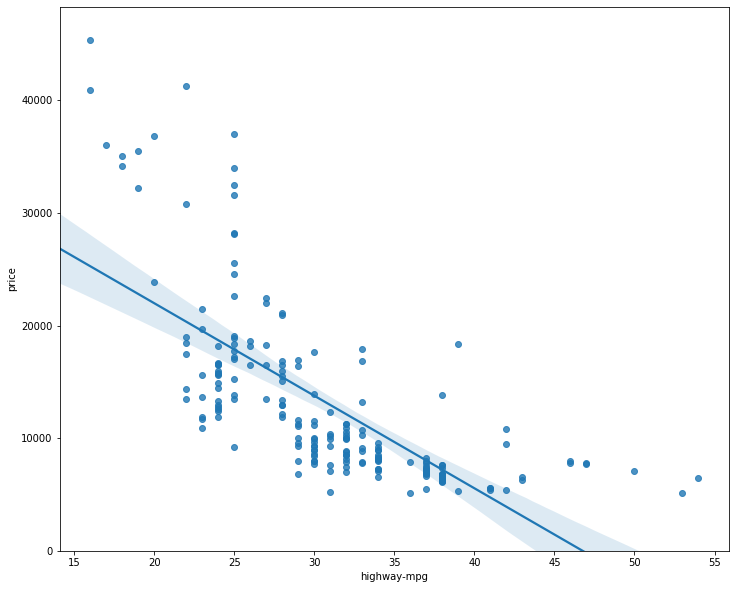

In [72]:
# Regression plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.The data points are scattered around the regression line,this will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. The data is too far off from the line, this simple linear model might not be the best model for this data.</p>
    

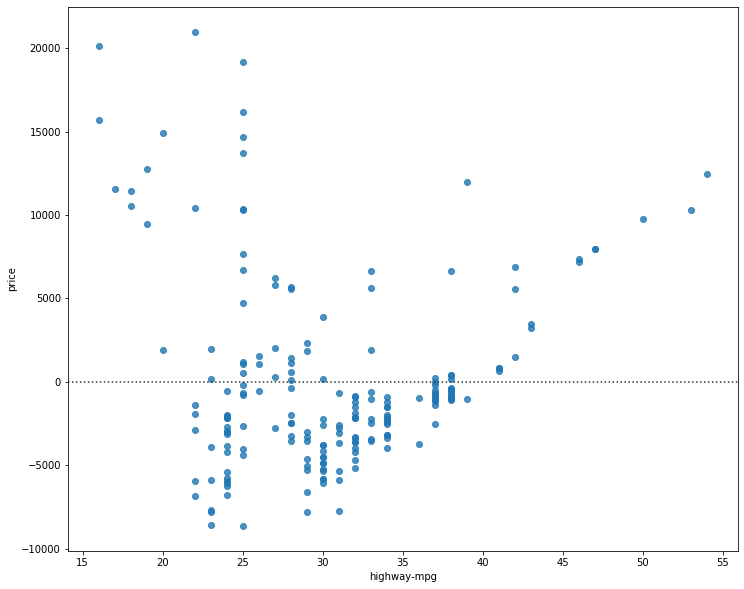

In [73]:
# Residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<P>this residual plot that the residuals are not randomly spread around the x-axis,so this model is not appropriate for this data</P>

In [77]:
#highway_mpg_fit
lm.fit(X1, Y)
# Find the R^2
print('The R-square is: ', lm.score(X1, Y))

The R-square is:  0.4965911884339175


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y, Yhat))
print("the rmse value:",rmse)

the rmse value: 5624.503795415191


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [118]:
# Multiple linear regression
Z = df[['horsepower', 'curb-weight', 'engine-size','highway-mpg']]
lm.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
Y_hat1 = lm.predict(Z)

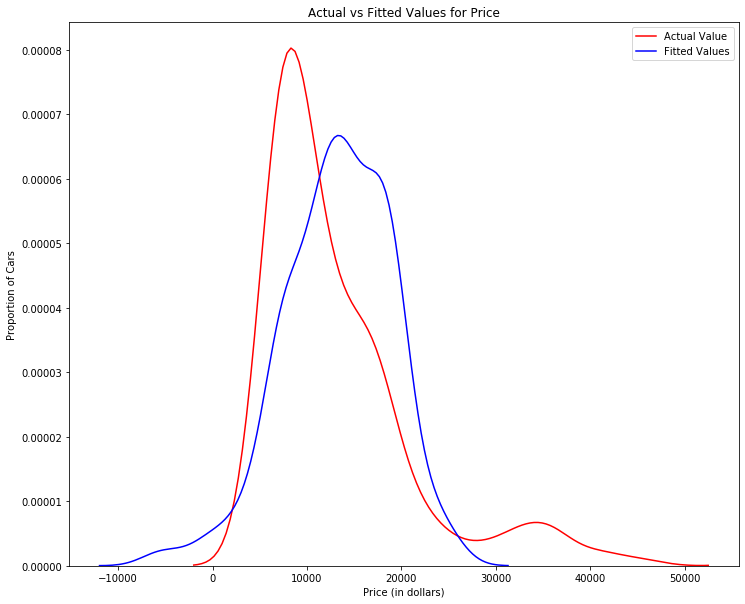

In [120]:
#distribution plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')


plt.show()
plt.close()

In [121]:
# Find the R^2
print('The R-square is: ', lm.score(Z, Y))

The R-square is:  0.8093732522175299


In [125]:
rmse = sqrt(mean_squared_error(Y,Y_hat1))
print("the rmse value:",rmse)

the rmse value: 3461.1125884343724


<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>

To compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and RMSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>RMSE: </b>The RMSE of SLR is 5.62x 10^15   while MLR has an RMSE of 3.46x 10^15 . </li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the RMSE show that MLR seems like the better model fit in this case, compared to SLR.

we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
You can build a better model with appropriate variables by appling various feature selection and feature engineering methods.
